In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures

### Data Cleaning

In [2]:
df = pd.read_csv('C:/Users/jul/Desktop/MA415/high_diamond_ranked_10min.csv')
df.head(3)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


In [3]:
df.shape    # 9879 rows and 40 columns in the dataset

(9879, 40)

In [4]:
df = df.drop(df.columns[0], axis = 1)    # drop the 'gameId' column
df.head(3)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


In [5]:
df.columns    # all features in the dataset

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

(array([1.534e+03, 6.238e+03, 4.800e+02, 4.120e+02, 5.410e+02, 1.900e+02,
        1.220e+02, 5.100e+01, 4.900e+01, 8.300e+01, 6.300e+01, 1.000e+01,
        2.600e+01, 8.000e+00, 1.800e+01, 9.000e+00, 1.300e+01, 1.400e+01,
        6.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  5.        ,  13.16666667,  21.33333333,  29.5       ,
         37.66666667,  45.83333333,  54.        ,  62.16666667,
         70.33333333,  78.5       ,  86.66666667,  94.83333333,
        103.        , 111.16666667, 119.33333333, 127.5       ,
        135.66666667, 143.83333333, 152.        , 160.16666667,
        168.33333333, 176.5       , 184.66666667, 192.83333333,
        201.        , 209.16666667, 217.33333333, 225.5       ,
        233.66666667, 241.83333333, 250.        ]),
 <BarContainer object of 30 artists>)

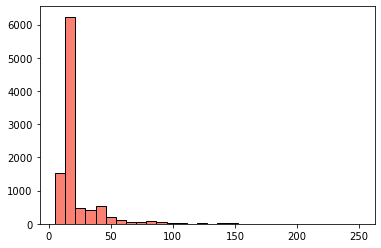

In [6]:
# matplotlib histogram of the feature 'blueWardsPlaced'
plt.hist(df['blueWardsPlaced'], color = 'salmon', edgecolor = 'black',
         bins = int(150/5))

In [7]:
bwp = df['blueWardsPlaced'] 
rwp = df['redWardsPlaced']
# 90% confidence interval
print(bwp.quantile([0.05, 0.95]).T.round(2))
print(rwp.quantile([0.05, 0.95]).T.round(2))

0.05    12.0
0.95    53.0
Name: blueWardsPlaced, dtype: float64
0.05    12.0
0.95    53.0
Name: redWardsPlaced, dtype: float64


In [8]:
df = df[df['blueWardsPlaced'] <= 50]  # drop the edge cases, wards placed > 50
df = df[df['redWardsPlaced'] <= 50]
df.shape

(8780, 39)

In [9]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [10]:
# drop the dependent features
df = df.drop(['blueEliteMonsters', 'blueGoldPerMin', 'redFirstBlood', 'redKills',
              'redDeaths', 'redEliteMonsters', 'redGoldDiff', 'redGoldPerMin'], axis = 1)
df.shape

(8780, 31)

### KNN Classifier

In [11]:
(train, test) = train_test_split(df, train_size = 0.8, test_size=0.2, shuffle = True, stratify = df.blueWins, random_state = 0)
print(train['blueWins'].value_counts())
print(test['blueWins'].value_counts())

1    3528
0    3496
Name: blueWins, dtype: int64
1    882
0    874
Name: blueWins, dtype: int64


In [12]:
# baseline error rate on the training set
round(3496/(3528 + 3496), 3)

0.498

In [13]:
# baseline error rate on the test set
round(874/(882 + 874), 3)

0.498

In [14]:
X_train = train.iloc[:, 1:]
X_test = test.iloc[:, 1:]
y_train = train.iloc[:, 0]
y_test = test.iloc[:, 0]

In [15]:
# Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# cross Validation
knn = KNeighborsClassifier()
K = np.arange(100) + 1
grid = {"n_neighbors": K}
grid

knnCV = GridSearchCV(knn, param_grid=grid, return_train_score=True, n_jobs=-1)

knnCV.fit(X_train, y_train)

print(f'The best params is {knnCV.best_params_}, and the best valid score is {knnCV.best_score_}')

The best params is {'n_neighbors': 72}, and the best valid score is 0.7307779501373808


### Logistic Regression (Without Feature Engineering)

In [17]:
X = df.drop('blueWins', axis = 1)
y = df.blueWins

In [18]:
# cross-validation
lgr = LogisticRegression()

scores = cross_validate(lgr, X, y, return_train_score = True)
R2_train = scores['train_score'].mean()
R2_valid = scores['test_score'].mean()

print('train R2', R2_train.round(3))
print('validation R2', R2_valid.round(3))

train R2 0.732
validation R2 0.733


### Feature Importance

In [19]:
lgr = LogisticRegression()

feature = []
R2_train = []
R2_valid = []

for k in range(X.shape[1]):
    feature.append(X.columns[k])
    x = X.iloc[:,k]
    R2_valid_scores =  cross_validate(lgr, x.values.reshape(-1,1), y)['test_score']
    R2_valid.append(R2_valid_scores.mean())
    lgr.fit(x.values.reshape(-1,1), y)
    R2_train.append(lgr.score(x.values.reshape(-1,1),y))

In [20]:
# looking at R-squared value for each feature
results = pd.DataFrame()
results['feature'] = feature
results['train R2'] = R2_train
results['valid R2'] = R2_valid
results.sort_values('valid R2', ascending = False)

,feature,train R2,valid R2
14,blueGoldDiff,0.725513,0.725513
15,blueExperienceDiff,0.715034,0.715034
28,redExperienceDiff,0.715034,0.715034
24,redAvgLevel,0.650228,0.650228
10,blueAvgLevel,0.646925,0.646925
4,blueDeaths,0.641230,0.641230
3,blueKills,0.634169,0.634169
5,blueAssists,0.614579,0.614579
19,redAssists,0.611390,0.611390
2,blueFirstBlood,0.602164,0.602164


### Feature Engineering

In [21]:
# engineer training set polynomial features
poly = PolynomialFeatures(2, interaction_only=False, include_bias = False)
Xe_train = poly.fit_transform(X_train)
col = poly.get_feature_names_out(X.columns)
Xe_train = pd.DataFrame(Xe_train, columns=col)
print('             features shape =', X_train.shape)
print('features (engineered) shape =', Xe_train.shape)

             features shape = (7024, 30)
features (engineered) shape = (7024, 495)


In [22]:
# engineer test set polynomial features
poly = PolynomialFeatures(2, interaction_only=False, include_bias=False)
Xe_test = poly.fit_transform(X_test)
col = poly.get_feature_names_out(X.columns)
Xe_test = pd.DataFrame(Xe_test, columns=col)
print('             features shape =', X_test.shape)
print('features (engineered) shape =', Xe_test.shape)

             features shape = (1756, 30)
features (engineered) shape = (1756, 495)


In [23]:
# standardize features and convert back to dataframe
stnd = StandardScaler()
stnd.fit(Xe_train)
Xe_train = pd.DataFrame(stnd.transform(Xe_train),
                                columns = Xe_train.columns)
Xe_test  = pd.DataFrame(stnd.transform(Xe_test),
                                columns = Xe_test.columns)

In [24]:
Xe_train.head(3)

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,...,redTotalMinionsKilled^2,redTotalMinionsKilled redTotalJungleMinionsKilled,redTotalMinionsKilled redExperienceDiff,redTotalMinionsKilled redCSPerMin,redTotalJungleMinionsKilled^2,redTotalJungleMinionsKilled redExperienceDiff,redTotalJungleMinionsKilled redCSPerMin,redExperienceDiff^2,redExperienceDiff redCSPerMin,redCSPerMin^2
0,2.763177,-0.377239,0.990647,1.261417,1.679639,1.816559,1.323357,-0.475215,-0.205341,1.653898,...,-0.651836,-0.478275,-0.366636,-0.651836,1.962263,-0.238718,-0.478275,-0.654680,-0.366636,-0.651836
1,-0.712367,-0.845471,0.990647,0.264508,-0.738011,-0.158445,1.323357,2.104312,-0.205341,0.483383,...,0.095608,-0.805052,-0.777295,0.095608,-0.402372,0.000987,-0.805052,-0.516589,-0.777295,0.095608
2,-0.339987,1.027458,-1.009441,-0.732401,0.643504,-0.652195,-0.755654,2.104312,-0.205341,-0.481653,...,-0.568173,-0.583417,-0.255886,-0.568173,0.154351,-0.582529,-0.583417,-0.580321,-0.255886,-0.568173


### Feature Selection

In [51]:
# create bias column
Xe_train['bias'] = 1
Xe_test['bias']  = 1

In [54]:
def SelectFeature(model,candidates,X,y):
    N = len(candidates)
    R2 = np.zeros(N)
    for k in range(N):   
        model_k = model.copy()
        model_k.append(candidates[k])
        cv_results = cross_validate(lgr, X[model_k], y, n_jobs=-1)
        R2[k] = cv_results['test_score'].mean()
    R2_max   = R2.max()
    selected = candidates[R2.argmax()] 
    return (selected,R2_max)

In [55]:
# forward feature selection
model      = ['bias']
candidates = list(Xe_train.columns)
candidates.remove('bias')
R2 = []
lgr = LogisticRegression(fit_intercept=False)
cv_results = cross_validate(lgr,
                            Xe_train[model].values.reshape(-1,1),
                            y_train)
R2.append(cv_results['test_score'].mean())

while (len(candidates) > 0):
    print('candidates left:', len(candidates), end='')
    (selected, R2_max) = SelectFeature(model, candidates,
                                      Xe_train,
                                      y_train)
    candidates.remove(selected)
    model.append(selected)
    R2.append(R2_max)
    print('  selected:',selected)

results = pd.DataFrame()
results['feature added'] = model
results['valid R2'] = R2

ix = results['valid R2'].idxmax()
print()
print('use features 0 to',ix,end='')
R2_max = results['valid R2'].max()
print('    maximum validation R2 =',round(R2_max,3))
model_opt = model[0:ix+1]

## It takes over 20 hours to run...

candidates left: 495  selected: blueTotalExperience blueGoldDiff
candidates left: 494  selected: blueTotalJungleMinionsKilled redTotalMinionsKilled
candidates left: 493  selected: blueDragons blueHeralds
candidates left: 492  selected: blueTotalGold blueExperienceDiff
candidates left: 491  selected: blueTotalJungleMinionsKilled redDragons
candidates left: 490  selected: blueDragons blueTotalMinionsKilled
candidates left: 489  selected: blueWardsDestroyed redAssists
candidates left: 488  selected: blueTotalJungleMinionsKilled redHeralds
candidates left: 487  selected: blueDeaths blueHeralds
candidates left: 486  selected: blueWardsPlaced blueDragons
candidates left: 485  selected: blueHeralds redAssists
candidates left: 484  selected: blueTotalGold redWardsPlaced
candidates left: 483  selected: blueTotalJungleMinionsKilled redAvgLevel
candidates left: 482  selected: blueWardsDestroyed blueExperienceDiff
candidates left: 481  selected: blueExperienceDiff redWardsDestroyed
candidates left

In [81]:
lgr.fit(Xe_train[model_opt], y_train)
R2_train = lgr.score(Xe_train[model_opt], y_train)
R2_test  = lgr.score(Xe_test[model_opt], y_test)
print('train R2', R2_train.round(3))
print(' test R2', R2_test.round(3))

train R2 0.741
 test R2 0.727


In [93]:
myCoef = np.reshape(lgr.coef_, 35)

In [95]:
# coefficients
coef = pd.Series(myCoef, index = Xe_train[model_opt].columns)
print(coef.sort_values(ascending=False).head(10))

blueAvgLevel blueGoldDiff                             0.927914
blueTotalGold blueExperienceDiff                      0.260888
blueTotalExperience blueGoldDiff                      0.151842
blueTowersDestroyed redTowersDestroyed                0.092197
redHeralds redTotalJungleMinionsKilled                0.073736
blueTotalJungleMinionsKilled redCSPerMin              0.068194
blueTotalJungleMinionsKilled redTotalMinionsKilled    0.068194
blueDeaths blueHeralds                                0.052835
blueDragons blueTotalMinionsKilled                    0.050268
blueDragons blueCSPerMin                              0.050268
dtype: float64


### Decision Tree

In [25]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz

In [26]:
grid = {'max_depth':np.arange(1,20)}

Tree = DecisionTreeClassifier()
TreeCV = GridSearchCV(Tree, param_grid = grid, return_train_score = True)

In [27]:
TreeCV.fit(X,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             return_train_score=True)

In [28]:
TreeCV.best_params_

{'max_depth': 1}

In [29]:
print('accuracy rate', TreeCV.best_score_)

accuracy rate 0.7252847380410022


In [30]:
results = pd.DataFrame()
results['depth'] = grid['max_depth']
results['train acc'] = TreeCV.cv_results_['mean_train_score']
results['valid acc'] = TreeCV.cv_results_['mean_test_score']
results.head(5)

,depth,train acc,valid acc
0,1,0.727107,0.725285
1,2,0.727107,0.725285
2,3,0.727306,0.724601
3,4,0.732574,0.723349
4,5,0.740290,0.723918


<AxesSubplot:xlabel='depth'>

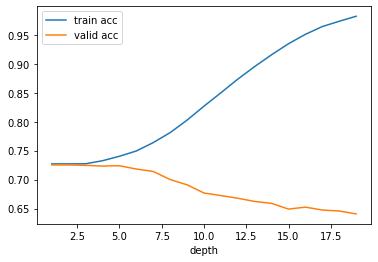

In [31]:
plot1 = results.plot.line(x = 'depth', y = 'train acc')
results.plot.line(x = 'depth', y = 'valid acc', ax = plot1)

In [32]:
tr1 = DecisionTreeClassifier(max_depth = 1)
tr1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [33]:
dot_data = tree.export_graphviz(tr1,
                               out_file = None,
                               feature_names = X.columns,
                               class_names = ['win', 'lose'],
                               proportion = True,
                               impurity = False,
                               filled = True,
                               rounded = True)

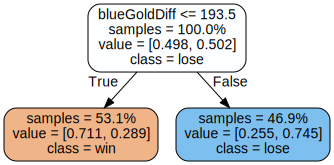

In [34]:
graph = graphviz.Source(dot_data)
graph   # tree with depth 1

In [35]:
tr2 = DecisionTreeClassifier(max_depth = 3)
tr2.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [36]:
dot_data = tree.export_graphviz(tr2,
                               out_file = None,
                               feature_names = X.columns,
                               class_names = ['win', 'lose'],
                               proportion = True,
                               impurity = False,
                               filled = True,
                               rounded = True)

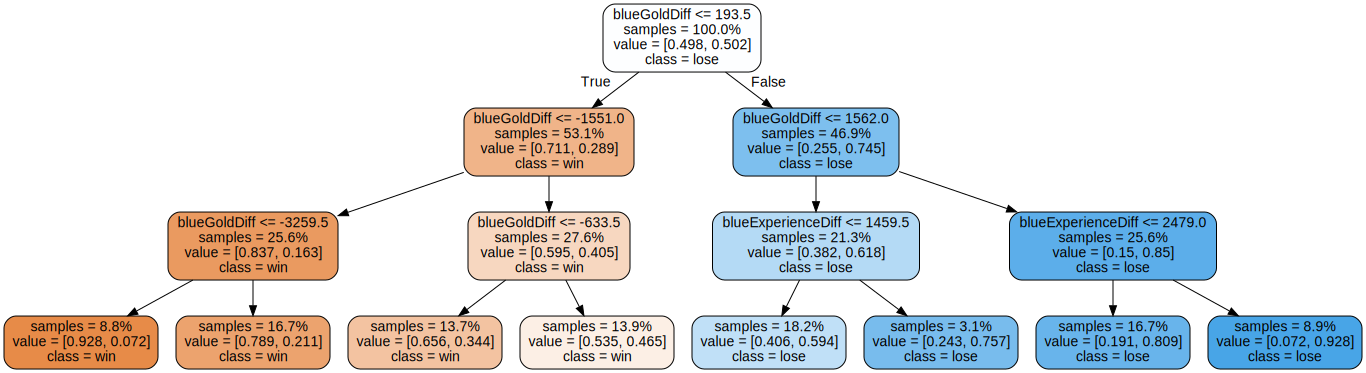

In [37]:
graph = graphviz.Source(dot_data)
graph   # tree with depth 3